# Project 2: Predicting sales prices with the Ames,Iowa Housing dataset

## 1. Modeling

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
train_processed = pd.read_csv("../datasets/train_processed.csv") # read train_processed csv file

print(train_processed.shape)
train_processed.head()

(2049, 270)


,Lot Frontage,Lot Area,Mas Vnr Area,Bsmt Unf SF,Low Qual Fin SF,Gr Liv Area,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,...,242,243,244,245,246,247,248,249,250,251
0,73.339258,13517,289.0,192.0,0,1479,6,0,2.0,475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,43.000000,11492,132.0,276.0,0,2122,8,1,2.0,559.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.000000,7922,0.0,326.0,0,1057,5,0,1.0,246.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,73.000000,9802,0.0,384.0,0,1444,7,0,2.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,82.000000,14235,0.0,676.0,0,1445,6,0,2.0,484.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
test = pd.read_csv("../datasets/test.csv") # read test csv file for 'Id' columns

test_processed = pd.read_csv("../datasets/test_processed.csv") # read test_processed csv file

print(test_processed.shape)
test_processed.head()

(878, 268)


,Lot Frontage,Lot Area,Mas Vnr Area,Bsmt Unf SF,Low Qual Fin SF,Gr Liv Area,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,...,242,243,244,245,246,247,248,249,250,251
0,69.000000,9142,0.0,1020,0,1928,9,0,1,440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,88.032863,9662,0.0,1967,0,1967,10,0,2,580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,58.000000,17104,0.0,100,0,1496,7,1,2,426,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60.000000,8520,0.0,968,0,968,5,0,2,480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,76.523057,9500,247.0,785,0,1394,6,2,2,514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# Declare X and y variable 

X = train_processed.drop(['SalePrice','log_price'], axis = 1)
y = train_processed['log_price']

### Perform Train test split

In [5]:
# Create train test split at 80% train, 20% test

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42 )

### Establish baseline score

We need to calculate baseline accuracy in order to tell if our model is outperforming the null model (predicting the majority class).

In [6]:
# calculate the mean of y_test as baseline score
baseline = np.exp(y_test).mean()
baseline

178979.70975609755

## 2.1 Ridge regression

In [7]:
# Instantiate StandardScaler
ss = StandardScaler()

# Fit and transform train.
X_train_sc = ss.fit_transform(X_train)

# Transform test.
X_test_sc = ss.transform(X_test)

### 2.2 Fit Ridge Regression with deafult parameters.

In [8]:
# Instantiate.
ridge = Ridge()

# Fit on train.
ridge.fit(X_train_sc, y_train)

Ridge()

In [9]:
# Evaluate (predict and return 'accuracy' score).
ridge.score(X_test_sc, y_test)

0.8818707915316527

The accuracy of the model is 88.7%

### 2.3 Fine Tune the model by searching the best hyperparameters

In [10]:
ss_2 = StandardScaler()
ridge_2 = Ridge()

## create pipeline for ridge regression
ridge_pipeline = Pipeline([
                ('ss', ss_2),
                ('ridge', ridge_2)
])


In [11]:
ridge_pipeline.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('ridge', Ridge())],
 'verbose': False,
 'ss': StandardScaler(),
 'ridge': Ridge(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

In [12]:
# Create dictionary of hyperparameters (param_grid).
ridge_params = { 'ss__with_mean': [True, False], 
                 'ss__with_std': [True, False],
                'ridge__alpha' : np.arange(0, 3, 0.2),
                'ridge__normalize': [True,False]
}

In [13]:
# Instantiate GridSearchCV object.
ridge_gridsearch = GridSearchCV(ridge_pipeline,
                               ridge_params,
                               cv=5,
                               verbose=1, 
                               )

In [14]:
ridge_gridsearch.fit(X_train, y_train) # Fit the GridSearchCV object to the data

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8]),
                         'ridge__normalize': [True, False],
                         'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]},
             verbose=1)

In [15]:
ridge_gridsearch.best_params_

{'ridge__alpha': 2.6,
 'ridge__normalize': False,
 'ss__with_mean': True,
 'ss__with_std': False}

In [16]:
ss = StandardScaler(with_std=False, with_mean=True)
ridge = Ridge(alpha = 2.6, normalize = False)

In [17]:
ridge_model_pipe = Pipeline([
    ('ss', ss),
    ('ridge', ridge)
])

ridge_model = ridge_model_pipe.named_steps['ridge']

In [18]:
ridge_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler(with_std=False)),
                ('ridge', Ridge(alpha=2.6))])

### 2.4 Ridge Model evaluation

In [19]:
ridge_train_score = ridge_model_pipe.score(X_train, y_train)
print(f'Ridge model score on train dataset = {ridge_train_score}')

Ridge model score on train dataset = 0.9456636476828666


In [20]:
ridge_test_score = ridge_model_pipe.score(X_test, y_test)
print(f'Ridge model score on test dataset = {ridge_test_score}')

Ridge model score on test dataset = 0.88951495575985


Slight improve on the model score without tuning. 

In [21]:
y_pred_ridge = ridge_model_pipe.predict(X_test) # predict X_test dateset

In [22]:
ridge_rmse = metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_ridge),squared=False)
ridge_rmse

21367.014118660223

In [23]:
# predict kaggle test dataset
y_test_kaggle_ridge = np.exp(ridge_model_pipe.predict(test_processed))

###  2.5 Ridge Model Inferential Visualizations

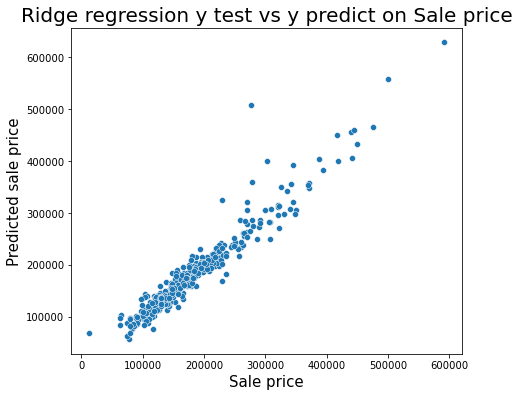

In [24]:
fig = plt.figure(figsize = (7,6))
sns.scatterplot(x = np.exp(y_test), y= np.exp(y_pred_ridge))
plt.title('Ridge regression y test vs y predict on Sale price', fontsize=20)
plt.xlabel('Sale price',fontsize=15)
plt.ylabel('Predicted sale price', fontsize=15)
plt.show()

In [25]:
ridge_r2_score = metrics.r2_score(y_test, y_pred_ridge)
print(f'Ridge model R2 score on predicted date = {ridge_r2_score}')

## The model explains 88.95 % of the variability of the response data around its mean.

Ridge model R2 score on predicted date = 0.88951495575985


In [26]:
ridge_y_pred_mean = np.exp(y_pred_ridge).mean()

diff = ridge_y_pred_mean - baseline

print(ridge_y_pred_mean)
print(diff/baseline*100)

180180.12324550597
0.67069808697548


The ridge model predcited mean price is $180180, which is 0.67% more than baseline score. The ridge model is accurate.

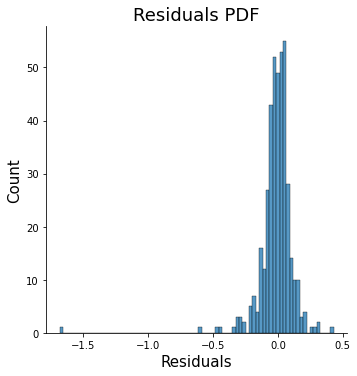

In [27]:
## Residual plot

residuals = y_test - y_pred_ridge

sns.displot(residuals)
plt.title('Residuals PDF', size = 18)
plt.xlabel('Residuals',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

The residuals of the model seems to be normally distrubted. There is some residual at the negative side of the log price, which means there is some estimation where the model predicted much larger housing price value compared to target value.

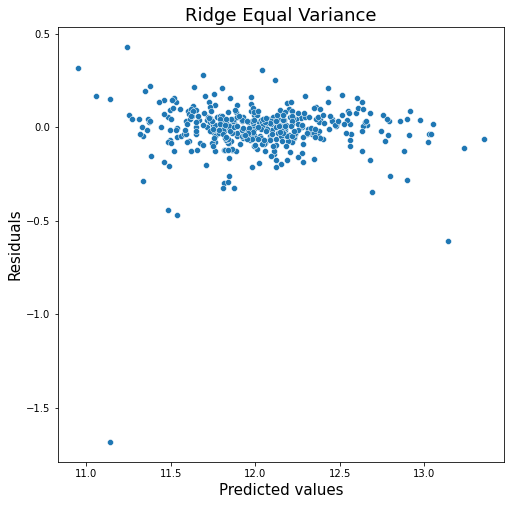

In [28]:
## Equal Variance
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_pred_ridge, y=residuals)
plt.title('Ridge Equal Variance', size = 18)
plt.xlabel('Predicted values',fontsize=15)
plt.ylabel('Residuals', fontsize=15)
plt.show()

The distribution of residual plots are not fully randomness.  The residual seems to be more concentrated between 11.5 to 12.5 of predicted value.

#### 2.6 Determine the weights and bias

In [29]:
ridge_model.coef_

array([ 3.42903507e-04,  4.18085621e-06,  3.35565260e-05, -6.42673272e-05,
        7.67550768e-05,  1.00729590e-04,  2.02776165e-03,  1.81048308e-02,
        2.35795551e-02,  3.06386484e-05,  5.91636064e-05, -3.30166741e-03,
        8.58021427e-04,  1.50043899e-04,  2.46268436e-02,  1.46066535e-04,
       -2.07159077e-02,  3.72916299e-02,  4.40489755e-02,  2.98961562e-02,
       -3.48209598e-02,  5.34957984e-02,  6.14712855e-02, -2.20798591e-02,
        1.04816087e-02, -3.63156772e-02, -2.79844436e-03,  0.00000000e+00,
       -8.05300735e-02, -3.95935752e-02, -1.39594240e-02, -1.48192227e-01,
        1.10393477e-01,  1.70425658e-02,  8.21961555e-02,  9.46646265e-02,
        6.15225298e-02,  7.38010239e-02,  4.32442523e-03, -2.67915351e-02,
        1.27280062e-03,  2.43279627e-02, -3.83853080e-02,  3.47640258e-03,
        0.00000000e+00,  1.70425658e-02,  1.93597100e-02, -1.70737041e-02,
       -5.70235772e-02, -1.21003541e-03, -7.56716402e-03, -1.54810494e-02,
        1.76406601e-02, -

In [30]:
coef_summary = pd.DataFrame(X_train.columns.values, columns=['Features'])
coef_summary['Weights'] = ridge_model.coef_
coef_summary.head()

,Features,Weights
0,Lot Frontage,0.000343
1,Lot Area,0.000004
2,Mas Vnr Area,0.000034
3,Bsmt Unf SF,-0.000064
4,Low Qual Fin SF,0.000077


In [31]:
coef_summary.sort_values(by='Weights').head()

,Features,Weights
229,213,-0.282980
174,158,-0.202029
214,198,-0.180947
105,89,-0.159329
115,99,-0.155169


In [32]:
ridge_model.intercept_

12.027060107350682

### 2.7 Export y_pred for kaggle submission

In [33]:
ridge_sub = pd.DataFrame({'Id':test['Id'],'SalePrice':y_test_kaggle_ridge})

ridge_sub

,Id,SalePrice
0,2658,127653.873548
1,2718,159212.977821
2,2414,215286.574980
3,1989,102822.282488
4,625,164519.570366
...,...,...
873,1662,193671.493014
874,1234,215480.216218
875,1373,130896.158449
876,1672,117817.010281


In [34]:
# export to csv file
ridge_sub.to_csv(r'../datasets/ridge_sub.csv', index = False)

## 3.1 Lasso regression

### 3.2 Fit Lasso Regression with deafult parameters.

In [35]:
# Instantiate StandardScaler
ss = StandardScaler()

# Fit and transform train.
X_train_sc = ss.fit_transform(X_train)

# Transform test.
X_test_sc = ss.transform(X_test)

In [36]:
# Instantiate.
lasso = Lasso()

# Fit on train.
lasso.fit(X_train_sc, y_train)

Lasso()

In [37]:
# Evaluate (predict and return 'accuracy' score).
lasso.score(X_test_sc, y_test)

-0.0011067747957018703

The accuracy of the lasso regression model performed badly without fine tuning. 

### 3.3 Fine Tune the model by searching the best hyperparameters

In [38]:
ss_2 = StandardScaler()
lasso_2 = Lasso()

## create pipeline for lasso regression
lasso_pipeline = Pipeline([
                ('ss', ss_2),
                ('lasso', lasso_2)
])


In [39]:
lasso_pipeline.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('lasso', Lasso())],
 'verbose': False,
 'ss': StandardScaler(),
 'lasso': Lasso(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [40]:
# Create dictionary of hyperparameters (param_grid).
lasso_params = { 'ss__with_mean': [True, False], 
                 'ss__with_std': [True, False],
                'lasso__alpha' : np.linspace(0.01, 1.0, 10),
                'lasso__normalize': [True,False]
}

In [41]:
# Instantiate GridSearchCV object.
lasso_gridsearch = GridSearchCV(lasso_pipeline,
                               lasso_params,
                               cv=5,
                               verbose=1, 
                               )

In [42]:
lasso_gridsearch.fit(X_train, y_train) # Fit the GridSearchCV object to the data

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'lasso__normalize': [True, False],
                         'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]},
             verbose=1)

In [43]:
lasso_gridsearch.best_params_

{'lasso__alpha': 0.01,
 'lasso__normalize': False,
 'ss__with_mean': True,
 'ss__with_std': True}

In [44]:
ss = StandardScaler(with_std=True, with_mean=True)
lasso = Lasso(alpha = 0.01, normalize = False)

In [45]:
lasso_model_pipe = Pipeline([
    ('ss', ss),
    ('lasso', lasso)
])

lasso_model = lasso_model_pipe.named_steps['lasso']

In [46]:
lasso_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lasso', Lasso(alpha=0.01))])

In [47]:
lasso_train_score = lasso_model_pipe.score(X_train, y_train)
print(f'Lasso model score on train dataset = {lasso_train_score}')

Lasso model score on train dataset = 0.9191583307535927


In [48]:
lasso_test_score = lasso_model_pipe.score(X_test, y_test)
print(f'Lasso model score on test dataset = {lasso_train_score}')

Lasso model score on test dataset = 0.9191583307535927


In [49]:
y_pred_lasso = lasso_model_pipe.predict(X_test)

In [50]:
lasso_rmse = metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso),squared=False)
lasso_rmse

21784.713830120232

In [51]:
# predict kaggle test dataset
y_test_kaggle_lasso = np.exp(lasso_model_pipe.predict(test_processed))

### 3.4 Inferential Visualizations

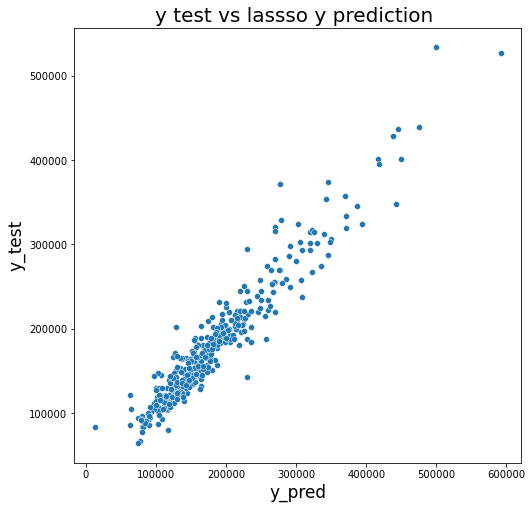

In [52]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = np.exp(y_test), y= np.exp(y_pred_lasso))
plt.title('y test vs lassso y prediction ', fontsize=20)
plt.xlabel('y_pred',fontsize=17)
plt.ylabel('y_test', fontsize=17)
plt.show()

In [53]:
lasso_r2_score = metrics.r2_score(y_test, y_pred_lasso)
print(f'Lasso model R2 score on predicted date = {lasso_r2_score}')

## The model explains 86.18 % of the variability of the response data around its mean.

Lasso model R2 score on predicted date = 0.861820039242035


In [54]:
y_pred_mean = np.exp(y_pred_lasso).mean()

diff = y_pred_mean - baseline

print(y_pred_mean)
print(diff/baseline*100)

177648.13079672074
-0.7439831929504224


The lasso model predcited mean price is $177648, which is -0.67% less than baseline score.

<Figure size 576x576 with 0 Axes>

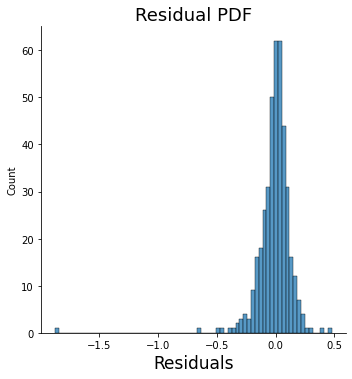

In [55]:
## Residual plot

residuals = y_test - y_pred_lasso

plt.figure(figsize=(8,8))
sns.displot(residuals)
plt.title('Residual PDF', size = 18)
plt.xlabel('Residuals',fontsize=17)
plt.show()


The residuals of the model seems to be normally distrubted. There is some residual at the negative side of the log price, which means there is some estimation where the model predicted much larger housing price value compared to target value.

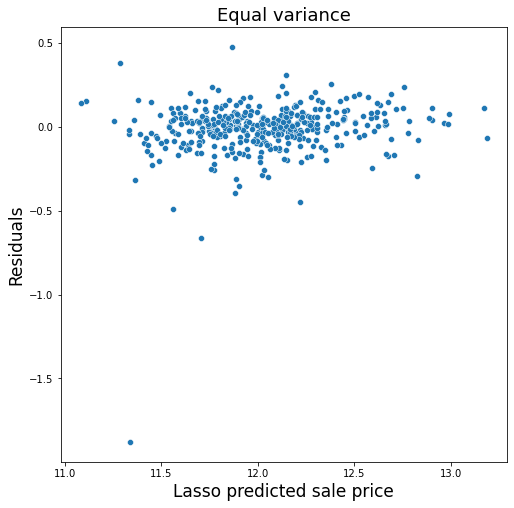

In [56]:
## Equal Variance
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_pred_lasso, y=residuals)
plt.title('Equal variance', size = 18)
plt.xlabel('Lasso predicted sale price',fontsize=17)
plt.ylabel('Residuals',fontsize=17)
plt.show()

The residuals for lasso model are not scattered and random. 

#### 3.5 Determine the weights and bias

In [57]:
lasso_model.coef_ # get lasso coefficient

array([ 0.00092374,  0.01471077,  0.0004465 , -0.00244253,  0.        ,
        0.04616119,  0.        ,  0.01724692,  0.01793639,  0.01699199,
        0.00322063, -0.05095818,  0.        ,  0.12210796,  0.02863058,
        0.00711742, -0.00992035,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.00696667, -0.        ,  0.        , -0.0038859 , -0.        ,
       -0.        , -0.01898136,  0.        , -0.        , -0.        ,
        0.        , -0.00736021,  0.        ,  0.        , -0.        ,
       -0.00022398,  0.00103401, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.01307508, -0.        , -0.        ,
       -0.        ,  0.00239044, -0.        , -0.        , -0.00713444,
        0.        , -0.        , -0.        , -0.        ,  0.  

In [58]:
# convert the coefficient into dataframe

coef_summary = pd.DataFrame(X_train.columns.values, columns=['Features'])
coef_summary['Weights'] = lasso_model.coef_
coef_summary.head()

,Features,Weights
0,Lot Frontage,0.000924
1,Lot Area,0.014711
2,Mas Vnr Area,0.000447
3,Bsmt Unf SF,-0.002443
4,Low Qual Fin SF,0.000000


In [59]:
coef_summary.sort_values(by='Weights', ascending = False).head()

,Features,Weights
13,total_sf,0.122108
5,Gr Liv Area,0.046161
112,96,0.031368
14,total_bath,0.028631
111,95,0.018117


In [60]:
lasso_model.intercept_

12.027060107350682

### 3.6 Export y_pred for kaggle submission

In [61]:
lasso_sub = pd.DataFrame({'Id':test['Id'],'SalePrice':y_test_kaggle_lasso})
lasso_sub

,Id,SalePrice
0,2658,138583.656342
1,2718,175881.910021
2,2414,210610.642482
3,1989,106223.788844
4,625,178037.764088
...,...,...
873,1662,186984.252716
874,1234,214932.750896
875,1373,137826.291654
876,1672,116048.230324


In [62]:
# export to csv file
lasso_sub.to_csv(r'../datasets/lasso_sub.csv', index = False)

### 4.1 Ordinary Least Square regression (OLS) 

### 4.2 Fit Linear Regression with deafult parameters.

In [63]:
# Instantiate StandardScaler
ss = StandardScaler()

# Fit and transform train.
X_train_sc = ss.fit_transform(X_train)

# Transform test.
X_test_sc = ss.transform(X_test)

In [64]:
# Instantiate.
lr = LinearRegression()

# Fit on train.
lr.fit(X_train_sc, y_train)

LinearRegression()

In [65]:
# Evaluate (predict and return 'accuracy' score).
lr.score(X_test_sc, y_test)

-6.272482178660941e+22

The accuracy of the linear regression model is the worst without fine tuning. 

### 4.3 Fine Tune the model by searching the best hyperparameters

In [66]:
ss_2 = StandardScaler()
lr_2 = LinearRegression()

## create pipeline for lasso regression
linear_pipeline = Pipeline([
                ('ss', ss_2),
                ('lr', lr_2)
])

In [67]:
linear_pipeline.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('lr', LinearRegression())],
 'verbose': False,
 'ss': StandardScaler(),
 'lr': LinearRegression(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': False,
 'lr__positive': False}

In [68]:
# Create dictionary of hyperparameters (param_grid).
linear_params = { 'ss__with_mean': [True, False], 
                 'ss__with_std': [True, False],
                'lr__positive' : [True,False],
                'lr__normalize': [True,False]
}

In [69]:
# Instantiate GridSearchCV object.
linear_gridsearch = GridSearchCV(linear_pipeline,
                               linear_params,
                               cv=5,
                               verbose=1, 
                               )

In [70]:
linear_gridsearch.fit(X_train, y_train) # Fit the GridSearchCV object to the data

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__normalize': [True, False],
                         'lr__positive': [True, False],
                         'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]},
             verbose=1)

In [71]:
linear_gridsearch.best_params_

{'lr__normalize': False,
 'lr__positive': False,
 'ss__with_mean': True,
 'ss__with_std': False}

In [72]:
ss = StandardScaler(with_std=False)

In [73]:
linear_model_pipe = Pipeline([
    ('ss', ss),
    ('linear', lr)
])

linear_model = linear_model_pipe.named_steps['linear']

In [74]:
linear_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler(with_std=False)),
                ('linear', LinearRegression())])

In [75]:
linear_train_score = linear_model_pipe.score(X_train, y_train)
print(f'OLS model score on train dataset = {linear_train_score}')

OLS model score on train dataset = 0.951509926898538


In [76]:
linear_test_score = linear_model_pipe.score(X_test, y_test)
print(f'OLS model score on test dataset = {linear_test_score}')

OLS model score on test dataset = 0.8732201915654847


In [77]:
y_pred_linear = linear_model_pipe.predict(X_test)

In [78]:
linear_rmse = metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_linear),squared=False)
linear_rmse

21530.013554268942

In [79]:
# predict kaggle test dataset
y_test_kaggle_linear = np.exp(linear_model_pipe.predict(test_processed))

###  4.4 Inferential Visualizations

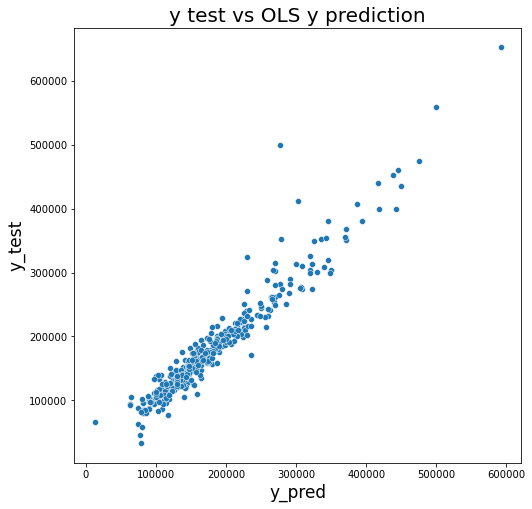

In [80]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = np.exp(y_test), y= np.exp(y_pred_linear))
plt.title('y test vs OLS y prediction', fontsize=20)
plt.xlabel('y_pred',fontsize=17)
plt.ylabel('y_test', fontsize=17)
plt.show()

In [81]:
linear_r2_score = metrics.r2_score(y_test, y_pred_linear)
linear_r2_score
## The model explains 87.32 % of the variability of the response data around its mean.

0.8732201915654847

In [82]:
y_pred_mean = np.exp(y_pred_linear).mean()

diff = y_pred_mean - baseline

print(y_pred_mean)
print(diff/baseline*100)

180281.40333793795
0.7272855585777119


The linear model predcited mean price is $180281, which is 0.72% more than baseline score. 

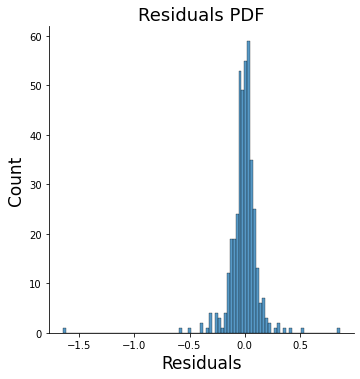

In [83]:
## Residual plot

residuals = y_test - y_pred_linear

sns.displot(residuals)
plt.title('Residuals PDF', size = 18)
plt.xlabel('Residuals',fontsize=17)
plt.ylabel('Count',fontsize=17)
plt.show()


The residuals of the model seems to be normally distrubted. There is some residual at the negative side and also the positive site of the log price.

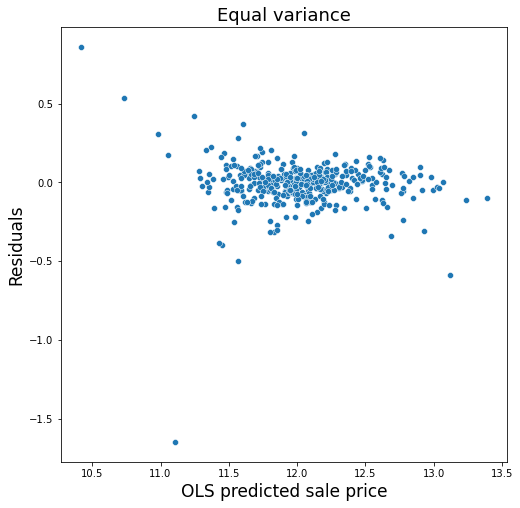

In [84]:
## Equal Variance

plt.figure(figsize=(8,8))
sns.scatterplot(x= y_pred_linear, y=residuals)
plt.title('Equal variance', size = 18)
plt.xlabel('OLS predicted sale price',fontsize=17)
plt.ylabel('Residuals',fontsize=17)
plt.show()

Similar to Ridge and lasso, the OLS residual are also concentrated within 11.5 to 12.5 range. 

#### Determine the weights and bias

In [85]:
linear_model.coef_

array([ 4.19312602e-04,  4.24392859e-06,  2.83949284e-05, -6.44348626e-05,
        4.18578887e-05,  9.62651738e-05,  3.52047565e-06,  1.50127699e-02,
        3.02406473e-02,  2.94479231e-05,  5.71498200e-05, -3.26671371e-03,
        6.69714065e-04,  1.49344113e-04,  2.30058074e-02,  1.31660468e-04,
       -1.97322925e-02,  9.01727941e-02,  1.69727713e-01,  7.11028029e-02,
       -3.53112446e-02,  4.56985008e-02,  3.68455341e-02, -8.05375537e-02,
       -1.61267345e-02, -4.24011457e-02, -4.10875990e-02, -4.35415592e-16,
       -1.19944749e-01, -1.11048073e-01,  1.01596948e-03,  4.53164775e-01,
        8.27394771e-01,  4.13130668e-01,  8.21998721e-01,  7.88889879e-01,
        7.36693415e-01,  2.13429862e-01,  1.70951267e-03, -4.19436254e-02,
        3.09237923e-03,  1.39325107e-02, -1.74312620e-02,  4.65031686e-03,
       -1.62231339e-14,  4.13130668e-01,  1.66785180e-02, -2.17620039e-02,
       -8.41135966e-02, -3.53748511e-03,  9.96205945e-03, -1.33253729e-02,
        6.19155812e-02,  

In [86]:
coef_summary = pd.DataFrame(X_train.columns.values, columns=['Features'])
coef_summary['Weights'] = linear_model.coef_
coef_summary.head()

,Features,Weights
0,Lot Frontage,0.000419
1,Lot Area,0.000004
2,Mas Vnr Area,0.000028
3,Bsmt Unf SF,-0.000064
4,Low Qual Fin SF,0.000042


In [87]:
coef_summary.sort_values(by='Weights', ascending = False).head()

,Features,Weights
137,121,1.056512
32,16,0.827395
34,18,0.821999
35,19,0.788890
36,20,0.736693


In [88]:
linear_model.intercept_

12.027060107350682

### 4.5 Export y_pred for kaggle submission

In [89]:
linear_sub = pd.DataFrame({'Id':test['Id'],'SalePrice':y_test_kaggle_linear})
linear_sub

,Id,SalePrice
0,2658,155439.229574
1,2718,153829.791858
2,2414,215211.022105
3,1989,102285.067063
4,625,164967.452127
...,...,...
873,1662,196941.845028
874,1234,215218.503415
875,1373,131576.966437
876,1672,116128.660790


In [90]:
# export to csv file
linear_sub.to_csv(r'../datasets/linear_sub.csv', index = False)

### 5.1 Model Comparision

In [91]:
comparison = {'R2 score':[ridge_r2_score, lasso_r2_score, linear_r2_score],
              'test_score':[ridge_train_score ,lasso_train_score , linear_train_score],
              'train_score':[ridge_test_score , lasso_test_score , linear_test_score ],
              'RMSE':[ridge_rmse, lasso_rmse, linear_rmse],
             }

In [92]:
model_comparison = pd.DataFrame(comparison, index =['Ridge_model',
                                'Lasso_model',
                                'OLS_model'])

model_comparison

,R2 score,test_score,train_score,RMSE
Ridge_model,0.889515,0.945664,0.889515,21367.014119
Lasso_model,0.861820,0.919158,0.861820,21784.713830
OLS_model,0.873220,0.951510,0.873220,21530.013554


Based on the table above, Ridge model score the highest among three models tested, in terms of R2 score, test score and train score. Ridge model also has lower root mean square error compared to the other two model. Ridge model is the most suitable model to predict the housing price for Ames, Iowa. 